# Lector de matricules
#### v1
L'objectiu d'aquest notebook es fer un proof of concept de la pipeline.

Aquesta pipeline s'encarregara de fer:
* Obtenir les imatges
* Llegir imatges
* Carregar el model YoLo v5
* Fer inferencia en les imatges
* Desar valors

# 0. Imports

In [30]:
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline
import torch
import torchvision
from PIL import Image

In [ ]:
# Reqs

# # Script for downloading and installing compatible versions.
# # Download the required packages and versions
# !wget https://download.pytorch.org/whl/cu111/torch-1.8.1%2Bcu111-cp39-cp39-linux_x86_64.whl
# !wget https://download.pytorch.org/whl/cu111/torchvision-0.9.1%2Bcu111-cp39-cp39-linux_x86_64.whl
# # Install the packages    
# !pip install torch-1.8.1+cu111-cp39-cp39-linux_x86_64.whl
# !pip install torchvision-0.9.1+cu111-cp39-cp39-linux_x86_64.whl

# 1. Obtencio d'imatges
Es procedira a descarregar imatges des de repositoris publics amb llicencia permissiva.

In [44]:
# Set base image directory
root = os.getcwd()
base_imdir = os.path.join(root,"images")

In [47]:
# Lookup all files in the image directory
(_, _, filenames) = next(os.walk(base_imdir))

In [48]:
print(filenames)

['bus.jpg', 'ambulancia-sem-696x528.jpg', 'zidane.jpg', 'zoom-bg02.jpg']


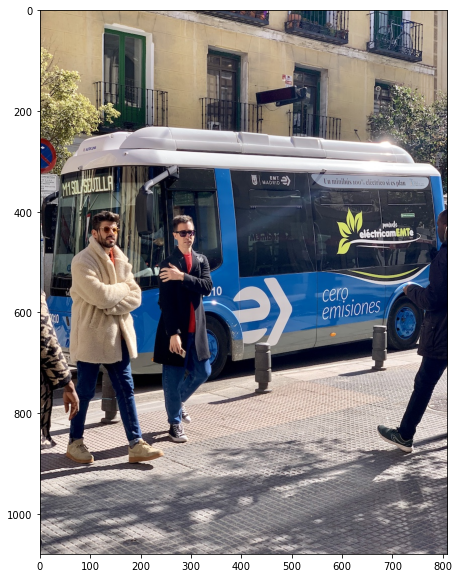

In [55]:
img_dir = os.path.join(base_imdir,filenames[0])
img = cv2.imread(img_dir)

plt.figure(figsize=[20,10])
plt.imshow(img[:,:,::-1])
plt.show()

In [56]:
print("PyTorch {} and Torchvision {} on ({})".format(torch.__version__,torchvision.__version__,torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'))

if torch.__version__.split('+')[-1] != torchvision.__version__.split('+')[-1]:
    print("Incompatible versions of pytorch and torchvision for YoLo-v5")

PyTorch 1.8.1+cu111 and Torchvision 0.9.1+cu111 on (GeForce RTX 2070)


In [71]:
# Load model from torch hub
model = torch.hub.load('ultralytics/yolov5', 'yolov5x', force_reload=False)

# List images to infer
imgs = []
imgs = [os.path.join(base_imdir,image) for image in filenames]
    
# Inference
results = model(imgs, size=640)

# Results
results.print()
results.save()

Using cache found in /home/noone/.cache/torch/hub/ultralytics_yolov5_master

                 from  n    params  module                                  arguments                     
  0                -1  1      8800  models.common.Focus                     [3, 80, 3]                    
  1                -1  1    115520  models.common.Conv                      [80, 160, 3, 2]               
  2                -1  1    309120  models.common.C3                        [160, 160, 4]                 
  3                -1  1    461440  models.common.Conv                      [160, 320, 3, 2]              
  4                -1  1   3285760  models.common.C3                        [320, 320, 12]                
  5                -1  1   1844480  models.common.Conv                      [320, 640, 3, 2]              
  6                -1  1  13125120  models.common.C3                        [640, 640, 12]                
  7                -1  1   7375360  models.common.Conv             

  0%|          | 0.00/168M [00:00<?, ?B/s]

YOLOv5 🚀 2021-4-13 torch 1.8.1+cu111 CUDA:0 (GeForce RTX 2070, 7982.3125MB)



Adding autoShape... 
image 1/4: 1080x810 4 persons, 1 bus
image 2/4: 528x696 1 truck
image 3/4: 720x1280 2 persons, 2 ties
image 4/4: 434x768 1 chair, 1 couch, 3 books
Speed: 12.8ms pre-process, 27.2ms inference, 0.9ms NMS per image at shape (4, 3, 640, 640)
Saved bus.jpg, ambulancia-sem-696x528.jpg, zidane.jpg, zoom-bg02.jpg to runs/hub/exp2


In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt  # install dependencies

In [22]:
import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.8.1+cu111 (GeForce RTX 2070)


In [ ]:
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source data/images/bus.jpg
Image(filename='runs/detect/exp/bus.jpg', width=600)


In [ ]:
!python yolov5/detect.py --source 'https://www.youtube.com/watch?v=bnPCbDiiD8A'